# Notebooks Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

In [4]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

$$ P(A \cap B) = P(A) * P(B) $$

### The Dot Product

In [5]:
a = np.array([1,2,3])
b = np.array([0,5,4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
1*0 + 2*5 + 3*4

22

In [8]:
c = np.array([[0,6],[3,0],[5,1]])
print('shape of c is ', c.shape)
print(c)

shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print('shape of the dot product is ', a.dot(c).shape)

[21  9]
shape of the dot product is  (2,)


In [10]:
[1*0 + 2*3 + 3*5 , 1*6 + 2*0 + 3*1]

[21, 9]

In [11]:
# Challenge: Can you figure out the dimensions of the dot product between X_test and prob_token_spam?

display(X_test.shape)
display(prob_token_spam.shape)
print('shape of the dot product is: ', X_test.dot(prob_token_spam).shape)

(1723, 2500)

(2500,)

shape of the dot product is:  (1723,)


## Set the Prior

$$ P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [12]:
PROB_SPAM = 0.3116 #value obtained in 07|Bayes Classifier training file

#### working with log probablities

$$ log(\,P(Spam \, | \, X)\,) - log(\,P(X)\,) + log(\,P(Spam)\,) $$

In [13]:
# Challenge: Take the log of a numpy array. Calculate the log probabilities of the tokens given that the 
# email was spam. This was stored in prob_token_spam
np.log(prob_token_spam)

array([-4.70350778, -5.31320598, -4.97909781, ..., -8.93034153,
       -9.35522472, -9.88585297])

## Joint probability in log format

In [14]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_token)) + np.log(PROB_SPAM)
joint_log_spam[:5]

array([  3.32308116,  15.69460446,  19.45609211, -16.40293079,
        28.89323876])

Challenge: Calculate the log probability that the emails are non-spam given their tokens. Store the result in a 
variable called joint_log_ham

$$ P(NonSpam \, | \, Tokens) = \frac{P(Tokens \, | \, NonSpam \,) \, P(NonSpam)}{P(Tokens)}$$
$$ P(NonSpam) = 1 - P(Spam) $$


In [15]:
PROB_HAM = 1 - PROB_SPAM
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_token)) + np.log(PROB_HAM)
joint_log_ham[:5]

array([-11.09346629, -40.78627329, -37.94631111,  -2.86786344,
       -60.52772823])

# Making Predictions

### Checking for the Higher Joint Probability

$$ P(Spam \, | \, X) \, > \, P(Ham\,|\,X) $$
<br>
<center><b>OR</b></center>
<br>
$$ P(Spam \, | \, X) \, < \, P(Ham\,|\,X) $$

In [16]:
# Challenge: Can you create the vector of predictions, our y_hat ? Remember that spam emails should have the
# value 1 (true) and the non spam emails should have the value 0 (false). Store your results in a variable
# called 'prediction'

# prediction = []
# for i in range(joint_log_prices.shape[0]):
#     if joint_log_prices[i] > joint_log_prices_ham[i]:
#         prediction.append(1)
#     else:
#         prediction.append(0)
# len(prediction)
prediction = joint_log_spam > joint_log_ham
display(len(prediction))
prediction[-5:]*1 #multiply by 1 to change from boolean to integer

1723

array([0, 0, 0, 0, 0])

In [17]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify
because we divide by P(X) in both joint probabilities, we can exclude it altogether

In [18]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(PROB_HAM)

# Metrics and Evaluation

## Accuracy

In [19]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly: ', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly: ', numdocs_wrong)

Docs classified correctly:  1673
Docs classified incorrectly:  50


In [20]:
# Accuracy
correct_docs / len(X_test)

0.9709808473592572

In [21]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.1%}'.format(fraction_wrong))
print(f'Accuracy of the model is: {round(correct_docs/len(X_test),3)*100}%')

Fraction classified incorrectly is 2.9%
Accuracy of the model is: 97.1%


## Visualizing the Results

In [22]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(start=-14000, stop=1, num = 1000)

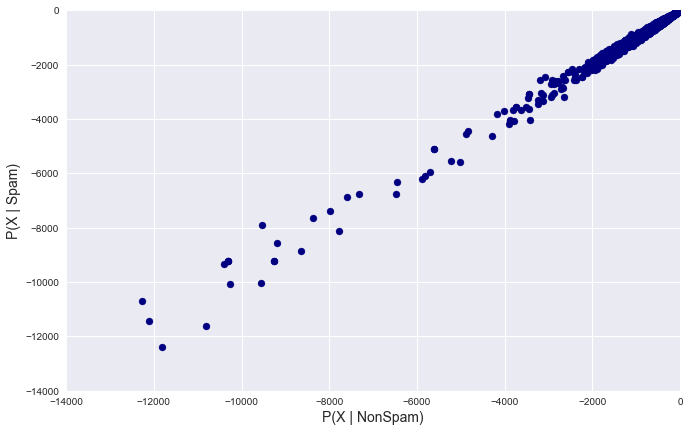

In [23]:
plt.figure(figsize=(11,7))
plt.style.use('seaborn')
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

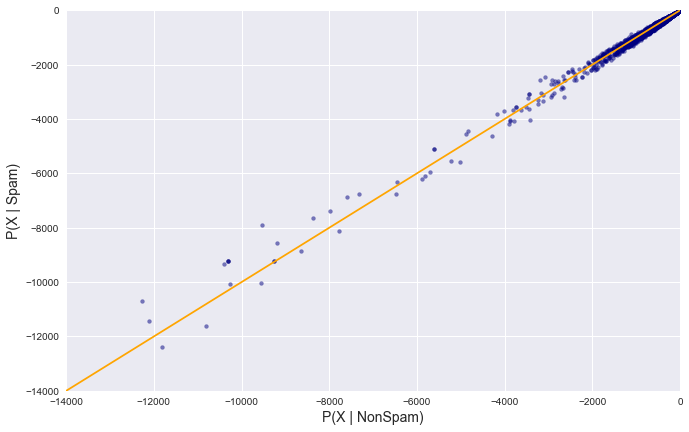

In [24]:
plt.figure(figsize=(11,7))
plt.style.use('seaborn')
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.5, s = 15)
plt.plot(linedata,linedata, color = 'orange')
plt.show()

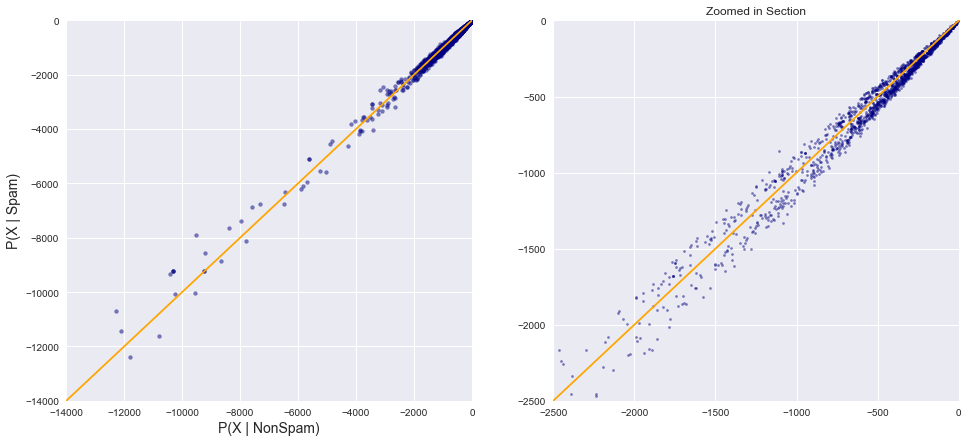

In [25]:
plt.figure(figsize=(16,7))
plt.style.use('seaborn')

# chart #1
plt.subplot(1,2,1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.5, s = 15)
plt.plot(linedata,linedata, color = 'orange')

# chart #2
plt.subplot(1,2,2)
plt.xlim([-2500,1])
plt.ylim([-2500,1])
plt.title('Zoomed in Section')
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.5, s = 5)
plt.plot(linedata,linedata, color = 'orange')


plt.show()

In [26]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

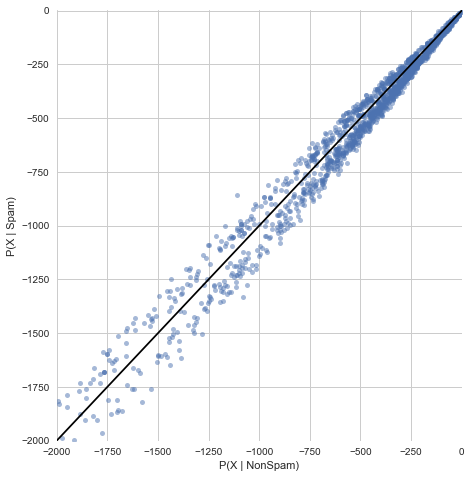

In [27]:
sns.lmplot(x=xaxis_label, y = yaxis_label, data = summary_df, height=6.5, fit_reg=False, 
           scatter_kws={'alpha':0.5, 's':25})

plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata, color='black')

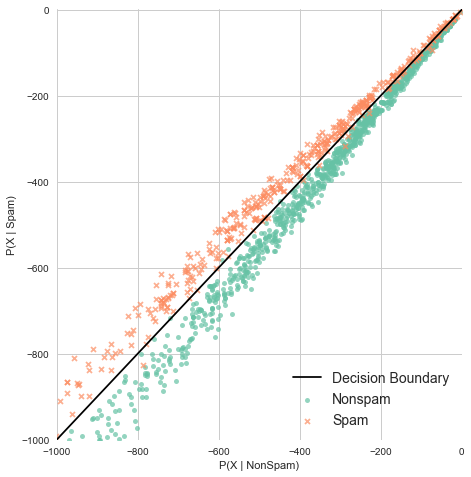

In [28]:
sns.lmplot(x=xaxis_label, y = yaxis_label, data = summary_df, height=6.5, fit_reg=False, legend = False,
           scatter_kws={'alpha':0.7, 's':25}, hue = labels, markers=['o', 'x'], palette='Set2')

plt.xlim([-1000,1])
plt.ylim([-1000,1])

plt.plot(linedata,linedata, color='black')
         
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

### False Positives and False Negatives

In [29]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1167,  556]))

In [30]:
true_pos = (y_test == 1) & (prediction == 1)

In [31]:
true_pos.sum()

547

In [32]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [33]:
# Challenge: Create a numpy array that features the False Positive for each datapoint. Call this variable false_pos
# Then work out how many false positives there were. After you've done that, do the same for the false negatives.
# Store those in a variable called false_neg
false_pos = (y_test == 0) & (prediction == 1)
false_neg = (y_test == 1) & (prediction == 0)
display(false_pos.sum())
display(false_neg.sum())

9

41

## Recall Score

In [34]:
# Challenge: Calculate the recall score. Store it in a variable called 'recall_score'
# Print the value of thte recall score as a percentage rounded to two decimal places

recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The recall score is: {:.2}'.format(recall_score))

# this score might not represent accuracy well because if false_neg is 0 then it shows perfect accuracy
# however that is not the case as there can be false positives

The recall score is: 0.93


## Precision Score

In [35]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('The precision score is: {:.3}'.format(precision_score))

The precision score is: 0.984


## F-Score or F1 Score

In [36]:
f1_score = 2 * ((precision_score * recall_score)/(precision_score + recall_score))
print('F Score is {:.2}'.format(f1_score))

F Score is 0.96
